In [129]:
import numpy as np
import pandas as pd
import seaborn as s
from matplotlib.pyplot import axis, figure, savefig, subplots
from matplotlib.transforms import Bbox
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, accuracy_score, recall_score

In [2]:
c = ["cap_shape","cap_surface","cap_color","bruises","odor","gill_attachment","gill_spacing","gill_size","gill_color","stalk_shape","stalk_root","stalk_surface_above_ring","stalk_surface_below_ring","stalk_color_above_ring","stalk_color_below_ring","veil_type","veil_color","ring_number","ring_type","spore_print_color","population","habitat"]
df = pd.read_csv("agaricus-lepiota.csv", names = c)
df = df.reset_index()
df = df.rename(columns = {"index":"target"})
df.stalk_root[df.stalk_root == "?"] = "missing"

In [3]:
df.cap_shape[df.cap_shape == "b"] = "bell"
df.cap_shape[df.cap_shape == "c"] = "conical"
df.cap_shape[df.cap_shape == "x"] = "convex"
df.cap_shape[df.cap_shape == "f"] = "flat"
df.cap_shape[df.cap_shape == "k"] = "knobbed"
df.cap_shape[df.cap_shape == "s"] = "sunken"

df.cap_surface[df.cap_surface == "f"] = "fibrous"
df.cap_surface[df.cap_surface == "g"] = "grooves"
df.cap_surface[df.cap_surface == "y"] = "scaly"
df.cap_surface[df.cap_surface == "s"] = "smooth"

In [19]:
Y = df.target
Y[Y == "e"] = 0
Y[Y == "p"] = 1
Y = Y.astype(int)
X = pd.get_dummies(df.drop("target", axis = 1))

In [97]:
tree = DecisionTreeClassifier(criterion = "gini",splitter = "best")
metrics = cross_validate(tree, X, Y, cv = 5, scoring = ["accuracy", "roc_auc","recall"])
print(metrics["test_accuracy"].mean())
print(metrics["test_roc_auc"].mean())
print(metrics["test_recall"].mean())

0.9963058734369079
0.9963799709340732
0.9984674329501916


Tree, unpruned:


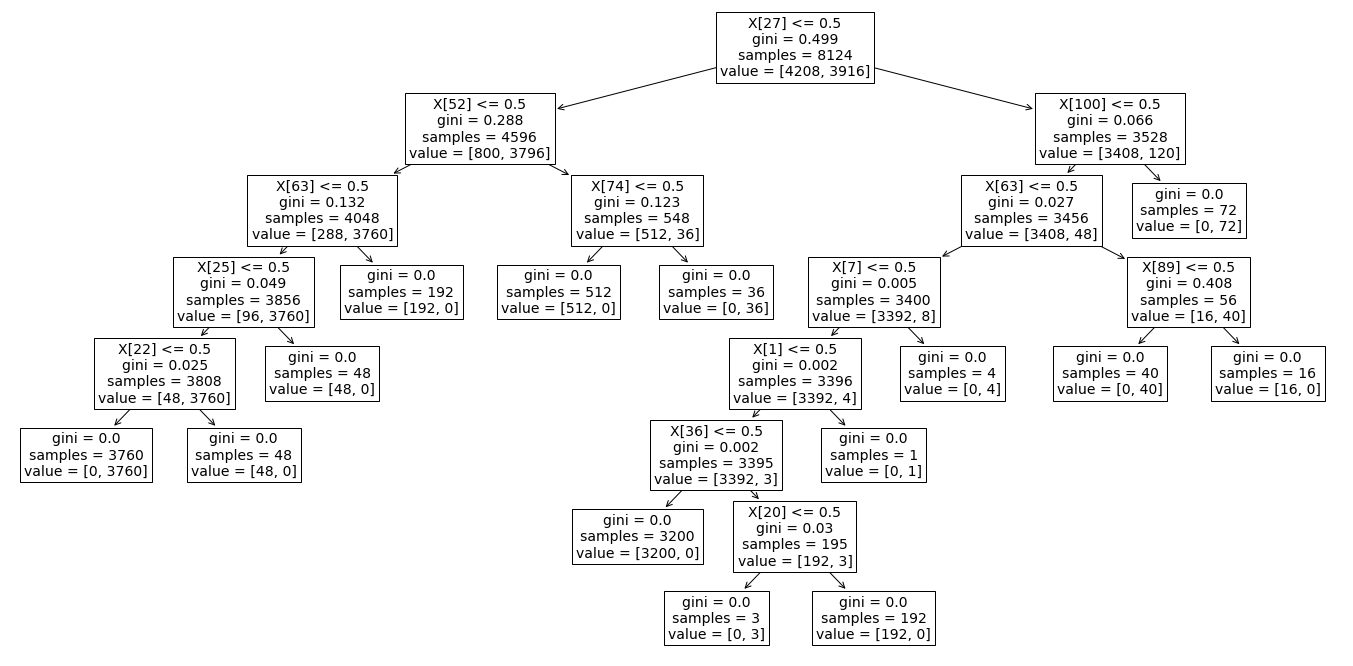

In [103]:
tree.fit(X,Y)
fig, ax = subplots(figsize=(24, 12))  # whatever size you want
plot_tree(tree, fontsize = 14)
print("Tree, unpruned:")

In [134]:
print("Accuracy: " + str(accuracy_score(tree.predict(X),Y)))
print("Recall:   " + str(recall_score(tree.predict(X),Y)))

Accuracy: 1.0
Recall:   1.0
